# Esame Laboratorio di Programmazione II - 22/07/2025


Scrivete chiaramente sul notebook il vostro nome e matricola e rinominate il file che consegnate come `matricola.ipynb` (la matricola è SMnumeri o ECnumeri).

Per ogni funzione e metodo che richiede un campionamento rispetto ad una distribuzione settate il seed a 0: ``np.random.seed(0)``.

Stampate il risultato delle domande e consegnate il compito eseguito, quindi per cui ogni cella ha il corrispondente output.
Quindi ad esempio

e.g., 
NON scrivete: 
```python 
    lista=np.array([1,2,3])
```
ma 
```python
    lista=np.array([1,2,3]) 
    print('lista =', lista)   
```
Attenzione!Se scrivete:
```python
    lista=np.array([1,2,3])
    lista
```
``lista`` sarà l'unico ouput che si vede di quella cella

NB: Potete usare anche più di una cella python per domanda e se l'output è una matrice molto grande non dovete stamparla.

Sarà valutata anche la presentazione, ad esempio un plot senza etichette sugli assi o illeggibili sarà valutato meno bene di uno con etichette chiare.

Cercate di commmentare il compito di modo che si capisca cosa avete fatto.

Controllate attentamente di avere consegnato il file giusto.

## Esercizio 1

Crea un vettore NumPy con le seguenti spese annuali per l’auto (in euro) sostenute da 7 persone:
3200, 2750, 4100, 3600, 2950, 5100, 4400

1. Calcola la spesa totale complessiva sostenuta dal gruppo.

2. Le persone con spese minori di 3000 € ottengono una detrazione fiscale del 15%. Applica la modifica al vettore.

3. Quanto ha risparmiato il gruppo dopo la detrazione fiscale?


In [365]:
import numpy as np

arr = np.array([3200, 2750, 4100, 3600, 2950, 5100, 4400])
#1
spesa_tot = arr.sum()
print(f"Spesa totale = {spesa_tot} euro")
#2
new_arr = np.where(arr < 3000, arr*(1-.15), arr)
print(f"L'array dopo la detrazione fiscale = {new_arr}")
#3
risparmio = spesa_tot - new_arr.sum()
print(f"Il gruppo ha risparmiato {risparmio} euro")

Spesa totale = 26100 euro
L'array dopo la detrazione fiscale = [3200.  2337.5 4100.  3600.  2507.5 5100.  4400. ]
Il gruppo ha risparmiato 855.0 euro


## Esercizio 2
1. Scrivi una funzione che simula il lancio di un dado per N volte e restituisce un array con il numero di volte che è uscita ciascuna faccia (da 1 a 6).
2. Calcolare la frequenza % con la dimensione del campione (numero di lanci) 100 volte da 10 a 5000.  Ottieni così 100 array di frequenze.
3. Fai il plot dell’andamento della frequenza media delle facce 1, 3 e 6 in funzione della dimensione del campione.



test della funzione con N=10
array =  [1 1 1 4 1 2]

Array di frequenze:
[[10.         10.         10.         40.         10.         20.        ]
 [21.66666667 18.33333333 11.66666667 20.         15.         13.33333333]
 [18.18181818 17.27272727 13.63636364 19.09090909 17.27272727 14.54545455]
 [19.8757764  14.9068323  17.39130435 21.73913043 13.66459627 12.42236025]
 [20.85308057 15.16587678 14.69194313 20.85308057 13.74407583 14.69194313]
 [18.70229008 14.50381679 15.26717557 22.13740458 13.35877863 16.03053435]
 [18.58974359 14.74358974 14.74358974 20.83333333 13.78205128 17.30769231]
 [19.06077348 15.19337017 14.36464088 20.99447514 14.36464088 16.02209945]
 [18.40193705 14.76997579 15.25423729 20.5811138  14.28571429 16.70702179]
 [19.00647948 15.98272138 14.25485961 19.65442765 15.1187905  15.98272138]
 [18.48249027 16.14785992 14.39688716 19.84435798 15.56420233 15.56420233]
 [17.90780142 16.31205674 14.0070922  20.74468085 15.60283688 15.42553191]
 [17.4267101  16.1237785  1

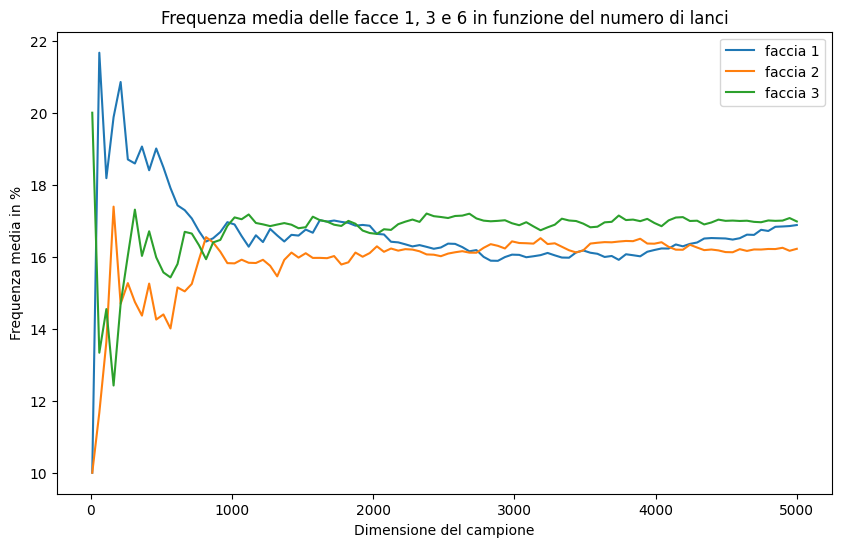

In [366]:

np.random.seed(0)

#1
def lancio_dado(N):
    np.random.seed(0)
    campione = np.random.choice([1,2,3,4,5,6], N)
    res = []
    for i in [1,2,3,4,5,6]:
        count = 0
        for n in campione:
            if i==n:
                count += 1
        res.append(count)
    return np.array(res)

res = lancio_dado(10)
print("test della funzione con N=10")
print("array = ", res)
#2
num_lanci = np.linspace(10, 5000, 100, dtype=int)
lista_array = np.array([lancio_dado(n) for n in num_lanci])

freq = []
for arr in lista_array:
    res = np.array([])
    for n in arr:
        res = np.append(res,n/sum(arr)*100)
    freq.append(res)

freq = np.array(freq)

print("\nArray di frequenze:")
print(freq)

#3
freq_1 = np.array([freq[i][0] for i in range(100)])
freq_2 = np.array([freq[i][2] for i in range(100)])
freq_3 = np.array([freq[i][5] for i in range(100)])

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(num_lanci, freq_1, label="faccia 1")
plt.plot(num_lanci, freq_2, label="faccia 2")
plt.plot(num_lanci, freq_3, label="faccia 3")
plt.legend()
plt.title("Frequenza media delle facce 1, 3 e 6 in funzione del numero di lanci")
plt.xlabel("Dimensione del campione")
plt.ylabel("Frequenza media in %")
plt.show()

## Esercizio 3

1. Genera una matrice NumPy di dimensioni 7 x 7, con valori estratti da una distribuzione normale con media = 0, ed std = 5.

2. Per ogni riga, identifica il valore più lontano da zero (cioè con valore assoluto massimo). Crea un array con questi 7 valori (uno per riga).

3. Calcola quante di queste righe hanno il valore più lontano da zero positivo?

In [367]:
np.random.seed(0)
#1
mat = np.random.normal(loc=0, scale=5, size=(7,7))
print("matrice = ", mat)

#2
dist = np.abs(mat) #matrice delle distanze da zero
max_post = dist.argmax(axis=1) #indice delle distanze max
row = np.arange(7) #indice riga
line_max = mat[row, max_post]
print("\nArray dei valori più lontano da zero per riga: ",line_max) 

#3 
count = np.sum(line_max > 0)
print("\nNumero di valori lontano da zero positivi: ", count)

matrice =  [[  8.82026173   2.00078604   4.89368992  11.204466     9.33778995
   -4.8863894    4.75044209]
 [ -0.75678604  -0.51609426   2.05299251   0.72021786   7.27136753
    3.80518863   0.60837508]
 [  2.21931616   1.66837164   7.47039537  -1.02579132   1.56533851
   -4.2704787  -12.76494908]
 [  3.26809298   4.32218099  -3.7108251   11.34877312  -7.27182837
    0.22879259  -0.93591925]
 [  7.66389607   7.34679385   0.77473713   1.8908126   -4.43892874
   -9.90398234  -1.73956075]
 [  0.78174485   6.1514534    6.01189924  -1.93663409  -1.51151375
   -5.24276483  -7.10008969]
 [ -8.53135095   9.75387698  -2.54826091  -2.19037151  -6.2639768
    3.88745178  -8.06948924]]

Array dei valori più lontano da zero per riga:  [ 11.204466     7.27136753 -12.76494908  11.34877312  -9.90398234
  -7.10008969   9.75387698]

Numero di valori lontano da zero positivi:  4


## Esercizio 4 

Utilizza il dataset cereal.csv.

Contiene dati nutrizionali (proteine, fibre, calorie, zuccheri, ecc.) per circa 70 cereali.


1.  Aggiungi una colonna chiamata `nutri_score`, definita come:
$$
\texttt{nutri\_score} = \frac{\texttt{protein} + \texttt{fiber}}{\texttt{calories}}
$$

Indica quanti nutrienti positivi ci sono per ogni caloria: più è alto, più il cereale è "nutriente a parità di energia.

2. Trova i **5 cereali con il `nutri_score` più alto** e stampali con `name` e `nutri_score`.

3. Filtra i cereali che soddisfano entrambi i criteri:

   - meno di 120 calorie  
   - più di 2 grammi di fibra 


4. **Crea un grafico a barre** dei **10 cereali con il `nutri_score` più alto**, usando `name` sull’asse x.

5. Crea uno **scatter plot** (grafico a punti) che visualizzi:

   - `calories` sull’asse x  
   - `nutri_score` sull’asse y
   - `protein` nel colore dei punti


In [368]:
import pandas as pd

df = pd.read_csv("cereal.csv", delimiter=";")

#1. aggiungo la colonna nutri_score al dataset
df["nutri_score"] = (df["protein"] + df["fiber"])/df["calories"]

#2
print("I 5 cereali con il nutri_score più alto")
print(df.sort_values(by="nutri_score", ascending=False)[["name", "nutri_score"]].head(5))


I 5 cereali con il nutri_score più alto
                         name  nutri_score
3   All-Bran with Extra Fiber     0.360000
0                   100% Bran     0.200000
2                    All-Bran     0.185714
9                 Bran Flakes     0.088889
64     Shredded Wheat 'n'Bran     0.077778


In [369]:
# #3
print("Cereali con meno di 120 calorie e più di 2 grammi di fibra")
df[(df["calories"]  < 120)&(df["fiber"] > 2)]

Cereali con meno di 120 calorie e più di 2 grammi di fibra


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,nutri_score
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973,0.200000
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505,0.185714
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912,0.360000
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253,0.066667
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813,0.088889
19,Cracklin' Oat Bran,K,C,110,3,3,140,4.0,10.0,7,160,25,3,1.00,0.50,40.448772,0.063636
26,Frosted Mini-Wheats,K,C,100,3,0,0,3.0,14.0,7,100,25,2,1.00,0.80,58.345141,0.060000
32,Grape Nuts Flakes,P,C,100,3,1,140,3.0,15.0,5,85,25,3,1.00,0.88,52.076897,0.060000
33,Grape-Nuts,P,C,110,3,0,170,3.0,17.0,3,90,25,3,1.00,0.25,53.371007,0.054545
50,Nutri-grain Wheat,K,C,90,3,0,170,3.0,18.0,2,90,25,3,1.00,1.00,59.642837,0.066667


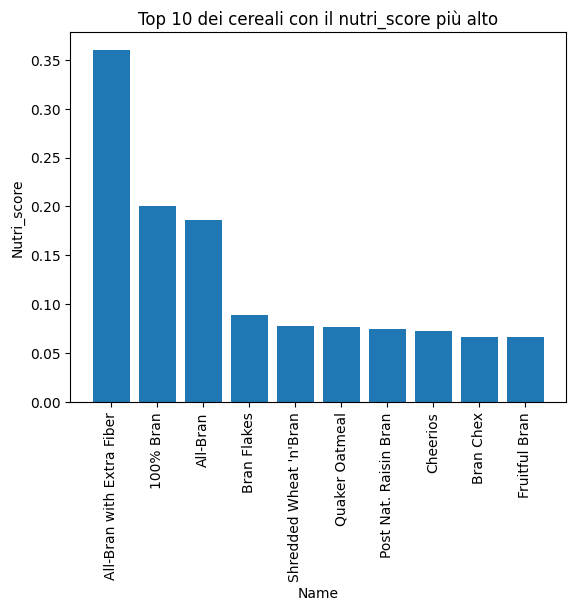

In [370]:
#4
top_10 = df.sort_values(by="nutri_score", ascending=False).head(10)
plt.bar(data=top_10, x="name", height="nutri_score")
plt.xticks(rotation= 90)
plt.title("Top 10 dei cereali con il nutri_score più alto")
plt.xlabel("Name")
plt.ylabel("Nutri_score")
plt.show()

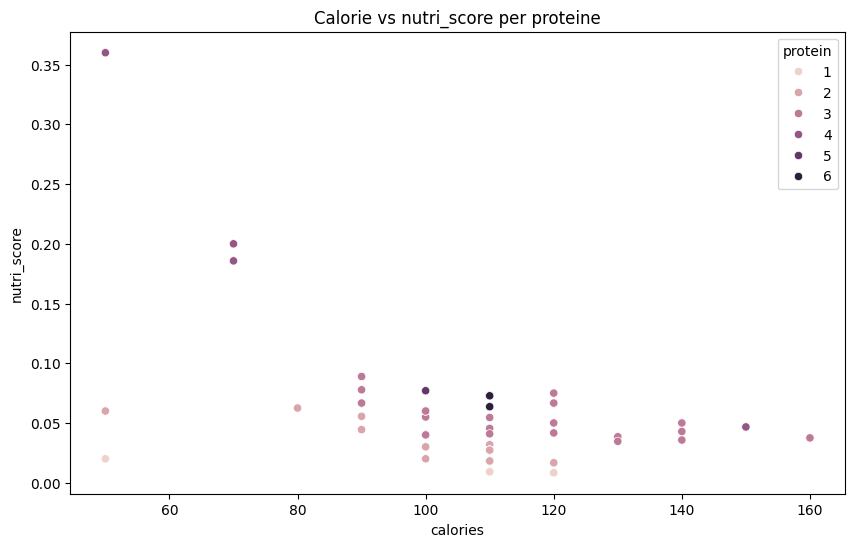

In [371]:
import seaborn as sns

#5
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="calories", y="nutri_score", hue="protein")
plt.title("Calorie vs nutri_score per proteine")
plt.show()


## Esercizio 5 

Utilizza il dataset `imdb_top_1000.csv`, che contiene informazioni su 1000 film recensiti su IMDB.

1. Quanti **valori mancanti** ci sono per colonna? Elimina le righe con i valori mancanti.

2. Elimina la colonna `Overview`. Aggiungi una colonna (`main_genre`) con solo il primo genere della colonna `genre`. Quali sono i 5 generi più frequenti?

3. Che attore/attrice è stato/a più volte la `Star1` e quello/a che ha fatto più film.

4. Calcola l'IMDB_rating medio e il Gross medio di ogni genere. Fai uno scatter plot dell'IMDB_rating medio e il Gross medio di ogni genere. Riesci a mettere anche l'ettichetta del genere?

5. Visualizza la distribuzione del IMDB_rating  e la distribuzione del `Gross` dei primi 5 main_genre. (Hint fai due violin plot).




In [372]:
dataset = pd.read_csv("imdb_top_1000 (1).csv")

#1
print("Valori mancanti per colonna")
print(dataset.isnull().sum())
dataset = dataset.dropna() #Tolgo le righe con valori mancanti


#2
dataset = dataset.drop(columns=["Overview"]) # tolgo la colonna Overview

dataset["main_genre"] = dataset["Genre"].apply(lambda x: x.split(',')[0].strip()) # aggiungo la colonna main_genre
print("\nI 5 generi più frequenti sono:")
dataset["Genre"].value_counts().head(5).reset_index()


Valori mancanti per colonna
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

I 5 generi più frequenti sono:


,Genre,count
0,Drama,58
1,"Drama, Romance",26
2,"Comedy, Drama",24
3,"Crime, Drama, Thriller",22
4,"Action, Adventure, Sci-Fi",21


In [373]:
#3
print(f"L'attore/attrice che è stato/a più volte la `Star1` è {dataset["Star1"].mode()[0]}")
star = pd.concat([dataset["Star1"], dataset["Star2"], dataset["Star3"], dataset["Star4"]])
print(f"L'attore/attrice che ha fatto più film è {star.mode()[0]}")

L'attore/attrice che è stato/a più volte la `Star1` è Tom Hanks
L'attore/attrice che ha fatto più film è Robert De Niro


IMDB_Rating medio per genere
   main_genre  IMDB_Rating
0      Action     7.937008
1   Adventure     7.927586
2   Animation     7.926984
3   Biography     7.916438
4      Comedy     7.877885
5       Crime     8.012162
6       Drama     7.941667
7      Family     7.800000
8   Film-Noir     8.100000
9      Horror     7.933333
10    Mystery     8.071429
11    Western     8.350000

Gross medio per genere
   main_genre         Gross
0      Action  1.568238e+08
1   Adventure  8.919198e+07
2   Animation  1.359713e+08
3   Biography  6.471483e+07
4      Comedy  3.888455e+07
5       Crime  4.246059e+07
6       Drama  4.682345e+07
7      Family  2.195553e+08
8   Film-Noir  4.491910e+05
9      Horror  8.175208e+07
10    Mystery  3.840551e+07
11    Western  1.455538e+07


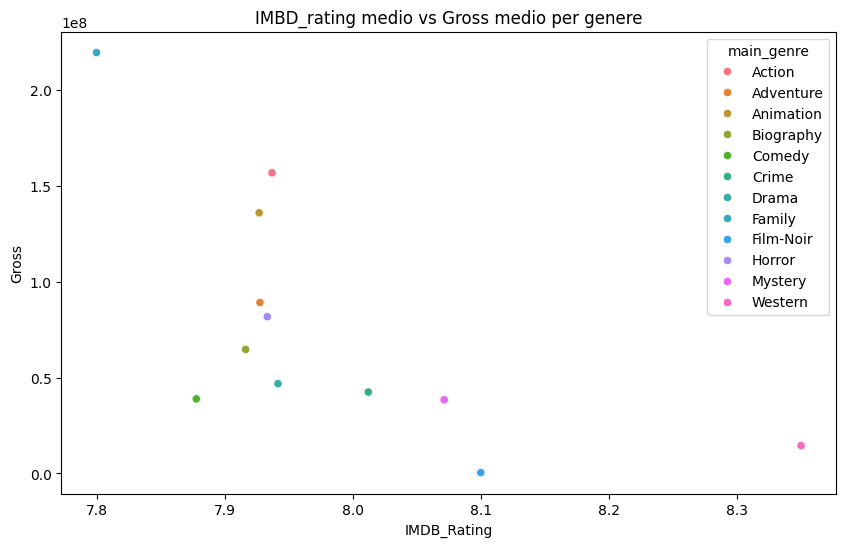

In [374]:
#4
imdb_medio = dataset.groupby("main_genre")["IMDB_Rating"].mean().reset_index()
print("IMDB_Rating medio per genere")
print(imdb_medio)
gross_medio = dataset.groupby("main_genre")["Gross"].mean().reset_index()
print("\nGross medio per genere")
print(gross_medio)

plt.figure(figsize=(10,6))
sns.scatterplot(x=imdb_medio["IMDB_Rating"], y=gross_medio["Gross"], hue=gross_medio["main_genre"])
plt.title("IMBD_rating medio vs Gross medio per genere")
plt.show()


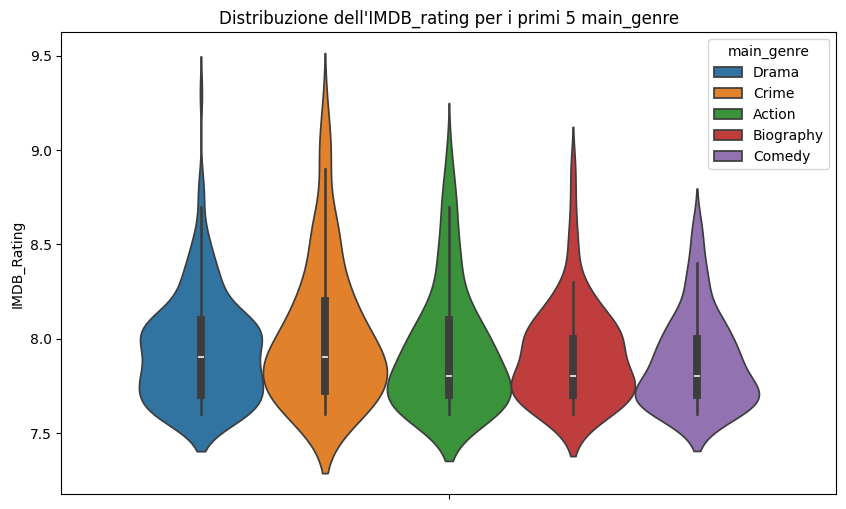

In [375]:
#5. Visualizza la distribuzione del IMDB_rating  e la distribuzione del `Gross` dei primi 5 main_genre. (Hint fai due violin plot).
top_main_genre = dataset["main_genre"].value_counts().head(5)
top_5 = dataset[dataset["main_genre"].isin(top_main_genre.index)]

plt.figure(figsize=(10,6))
sns.violinplot(data=top_5, y="IMDB_Rating", hue="main_genre")
plt.title("Distribuzione dell'IMDB_rating per i primi 5 main_genre")
plt.show()

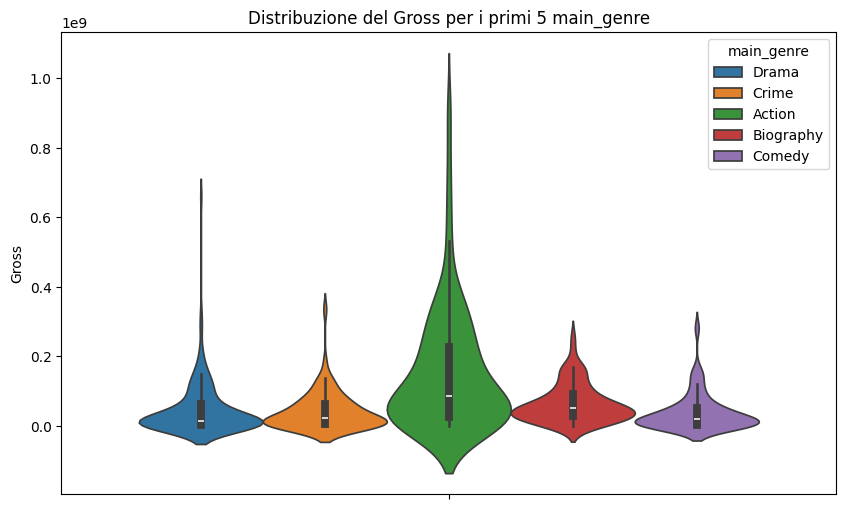

In [376]:
plt.figure(figsize=(10,6))
sns.violinplot(data=top_5, y="Gross", hue="main_genre")
plt.title("Distribuzione del Gross per i primi 5 main_genre")
plt.show()

## Esercizio 6

Considera i seguenti dati, che :

`x = np.linspace(0, 10, 100)`  
`y = -3.5 * x + 2 + np.random.normal(0, 10, 100)`

Cerca di riprodurre la retta fittando i parametri della funzione y = ax + b.

1. Stima i parametri della retta.
2. Calcola l’intervallo di confidenza al 95% dei parametri a e b.
N.B il secondo output del metodo curve_fit è proprio la matrice di covarianza: `params, cov = curve_fit(retta, x, y)`. 
L'**errore standard** di ciascun parametro si calcola come:

$$
\text{errore\_standard}_i = \sqrt{\text{cov}(i, i)}
$$

dove $\text{cov}(i, i)$ è l'elemento diagonale $i$-esimo della **matrice di covarianza**.

L’**intervallo di confidenza al 95%** si approssima con:

$$
\text{parametro}_i \pm 1.96 \times \text{errore\_standard}_i
$$
3. Plotta i punti originali e la retta ottenuta con anche l'intervallo di confidenza

I parametri della retta sono a= -3.797 e b= 4.085 con intervallo di confidenza [-4.479, -3.115] e [0.138,8.031] rispettivamente.



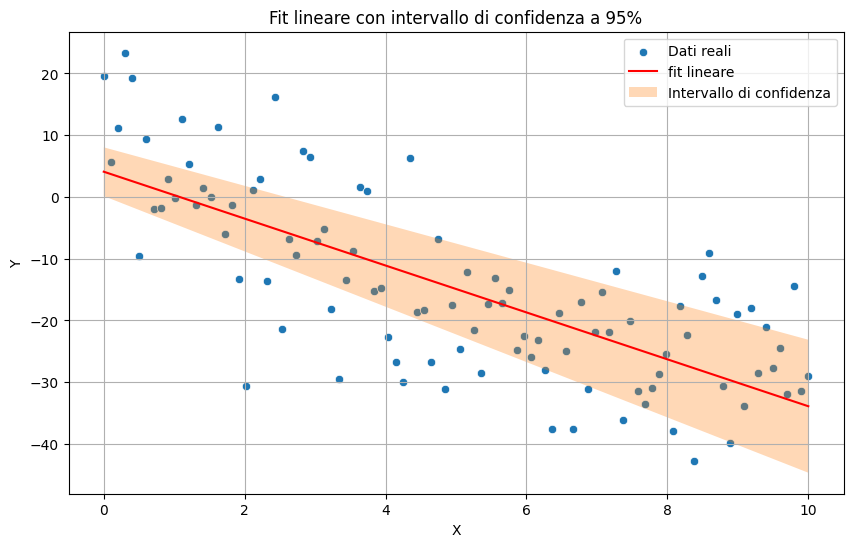

In [408]:
from scipy.optimize import curve_fit

np.random.seed(0)

x = np.linspace(0, 10, 100)  
y = -3.5 * x + 2 + np.random.normal(0, 10, 100)

#1
def retta(x,a,b): #funzione per il calcolo della retta
    return a*x +b

params, cov = curve_fit(retta, x, y)
a, b = params

#2
errore_standard = np.sqrt(np.diag(cov))
a_err, b_err = errore_standard
#costruzione dell'intervallo di confidenza di a e b
inter_a = [a - 1.96*a_err, a +1.96*a_err]
inter_b = [b - 1.96*b_err, b +1.96*b_err]
print((f"I parametri della retta sono a= {a:.3f} e b= {b:.3f} con intervallo di confidenza [{inter_a[0]:.3f}, {inter_a[1]:.3f}] e [{inter_b[0]:.3f},{inter_b[1]:.3f}] rispettivamente.\n"))

#3
#dati per rappresentare l'intervallo di confidenza
sup = retta(x, inter_a[0], inter_b[0])
inf = retta(x, inter_a[1], inter_b[1])

plt.figure(figsize=(10,6))
sns.scatterplot(x=x, y=y, label="Dati reali")
sns.lineplot(x=x, y=retta(x,a,b), color="red", label="fit lineare")
plt.fill_between(x, sup, inf, label="Intervallo di confidenza", alpha=.3)
plt.legend()
plt.title("Fit lineare con intervallo di confidenza a 95%")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

Paramètres estimés : a = -4.078, b = 5.710
Intervalle de confiance pour a : [np.float64(-4.771254909555893), np.float64(-3.38487976770246)]
Intervalle de confiance pour b : [np.float64(1.6982524191580062), np.float64(9.72268040881271)]


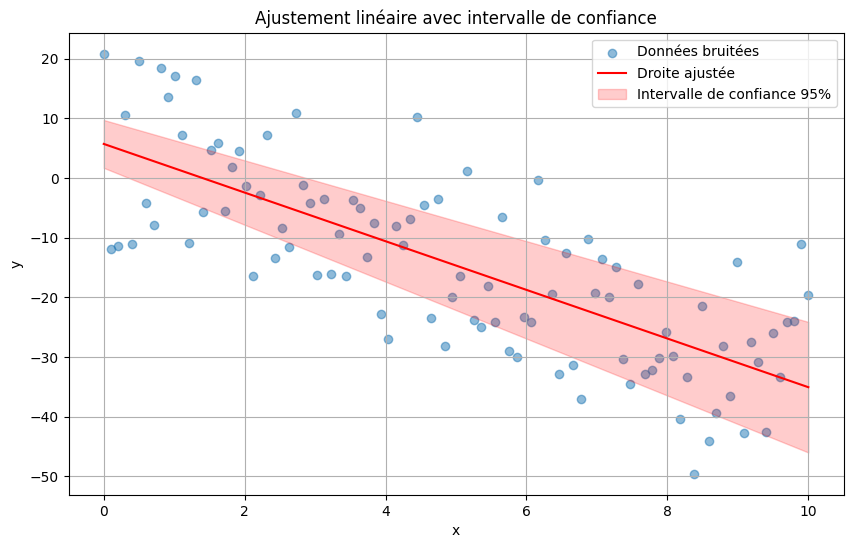

In [397]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 1. Création des données
x = np.linspace(0, 10, 100)
y = -3.5 * x + 2 + np.random.normal(0, 10, 100)

# 2. Définir la fonction modèle : y = ax + b
def retta(x, a, b):
    return a * x + b

# 3. Estimer les paramètres
params, cov = curve_fit(retta, x, y)

# 4. Extraire les paramètres
a_hat, b_hat = params
print(f"Paramètres estimés : a = {a_hat:.3f}, b = {b_hat:.3f}")

# 5. Calcul des erreurs standards (racine des éléments diagonaux de la matrice de covariance)
errors = np.sqrt(np.diag(cov))

# 6. Calcul des intervalles de confiance à 95 %
a_ci = [a_hat - 1.96 * errors[0], a_hat + 1.96 * errors[0]]
b_ci = [b_hat - 1.96 * errors[1], b_hat + 1.96 * errors[1]]
print(f"Intervalle de confiance pour a : {a_ci}")
print(f"Intervalle de confiance pour b : {b_ci}")

# 7. Tracer les points et la droite ajustée
plt.figure(figsize=(10,6))
plt.scatter(x, y, label='Données bruitées', alpha=0.5)

# Droite estimée
y_fit = retta(x, a_hat, b_hat)
plt.plot(x, y_fit, color='red', label='Droite ajustée')

# Droites bornes (pour visualiser l'incertitude)
y_fit_upper = retta(x, a_ci[0], b_ci[0])
y_fit_lower = retta(x, a_ci[1], b_ci[1])
plt.fill_between(x, y_fit_lower, y_fit_upper, color='red', alpha=0.2, label='Intervalle de confiance 95%')

plt.title("Ajustement linéaire avec intervalle de confiance")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
